# Replicate results on the Poker DVS dataset for the Grimaldi et al. 2021 paper

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

from network import network
from results import clustering_variability, online_accuracy
from tools import get_loader, get_dataset_info, fit_histo, predict_histo
import os, tonic

def printfig(fig, name):
    dpi_exp = None
    bbox = 'tight'
    path = '../../paper/5f22d412742c360001c92b46/fig/'
    fig.savefig(path+name, dpi = dpi_exp, bbox_inches=bbox, transparent=True)

/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS


## TODO
- make work the timealignment 
- classification as a function of jitter

## Information about the dataset

number of samples in the trainset: 48
number of samples in the testset: 20
----------------------------------------
number of samples in each class for the trainset: [12. 12. 12. 12.]
number of samples in each class for the testset: [5. 5. 5. 5.]
----------------------------------------


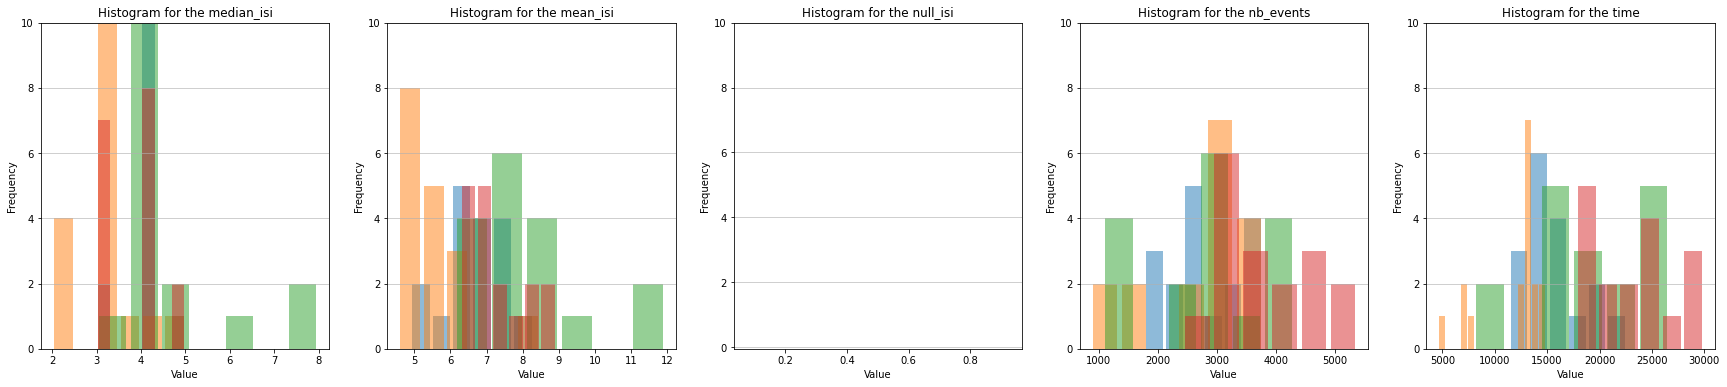

In [2]:
trainset = tonic.datasets.POKERDVS(save_to='../../Data', train = True, transform = tonic.transforms.NumpyAsType(int))
testset = tonic.datasets.POKERDVS(save_to='../../Data', train = False, transform = tonic.transforms.NumpyAsType(int))
values = get_dataset_info(trainset,testset, properties = ['median_isi', 'mean_isi', 'null_isi', 'nb_events', 'time'], distinguish_labels=True)

## Define the hyperparameters of the network

In [3]:
#for poker DVS
sensor_size = trainset.sensor_size
name = 'homhots'
tau = (0.3*2,0.3*4,0.3*8)
homeo = (3,0)
timestr = '2022-01-06_poker'

loading a network with name:
 ../Records/models/2022-01-06_poker_homhots_(3, 0)_[4, 8, 16]_[0.6, 1.2, 2.4]_[2, 4, 8].pkl


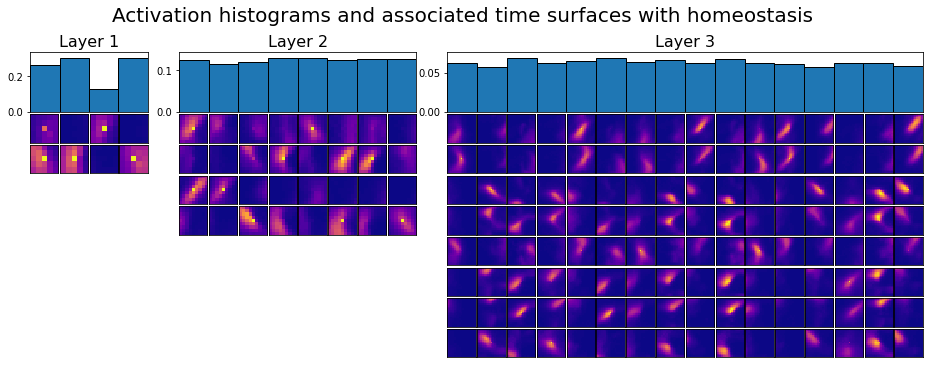

In [4]:
homhots = network(name = name, tau = tau, homeo = homeo, timestr = timestr, camsize=(sensor_size[0], sensor_size[1]))
loader = get_loader(trainset)
homhots.running(loader, trainset.ordering, trainset.classes, learn=True, train=True)
homhots.plotlayer();

# Online classification performance

/home/INT/grimaldi.a/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/INT/grimaldi.a/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS/tools.py:434: RuntimeWarning: Mean of empty slice
  onlinac = np.nanmean(matscor, axis=0)


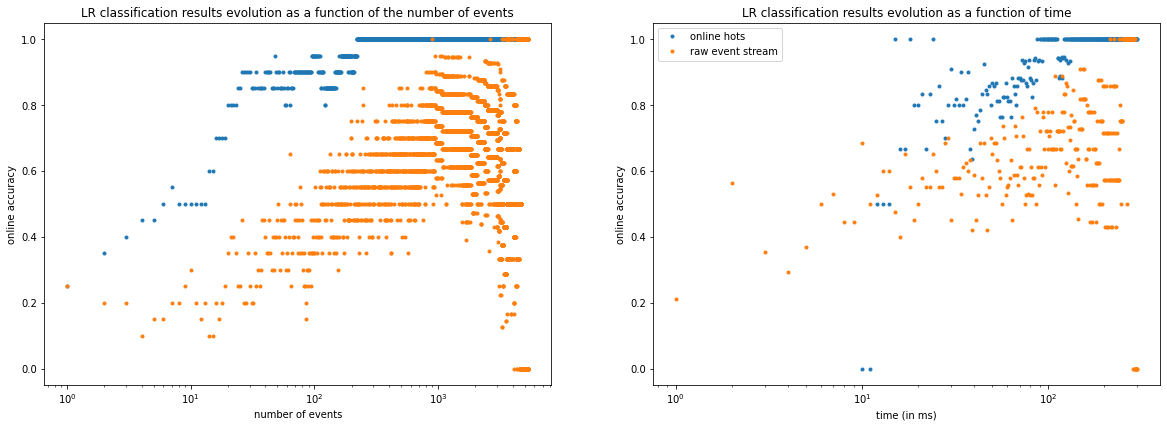

In [5]:
tau_cla = 15
timestep = 100
sensor_size = trainset.sensor_size
transform = tonic.transforms.Compose([tonic.transforms.ToTimesurface(sensor_size=sensor_size, tau=tau_cla, decay="exp")])
trainset_raw = tonic.datasets.POKERDVS(save_to='../../Data', train = True, transform = transform)
testset_raw = tonic.datasets.POKERDVS(save_to='../../Data', train = False, transform = transform)
#testset_tmstmps = tonic.datasets.POKERDVS(save_to='../../Data', train = False, transform = tonic.transforms.Compose([tonic.transforms.TimeAlignment()]))

online_accuracy(homhots, tau_cla, trainset_raw, testset_raw, testset, timestr, timestep)

# Classification with histogram 

In [6]:
histo, label = fit_histo(homhots)

Number of training samples: 48
load existing histograms


In [7]:
k = 8
accuracy = predict_histo(homhots, histo, label, k=k)
print(f'Accuracy for {k}-NN classifier: {accuracy}%')

Number of testing samples: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 2074.13it/s]

Accuracy for 8-NN classifier: 80.0%


## Trying different clusterings

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:49<00:00,  2.00it/s]


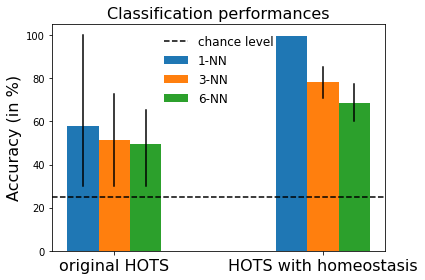

In [8]:
clustering_variability(trainset, testset, homeo, tau, '2022-01-06_poker')